In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Load data and combine

### train data

In [2]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head(2)

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
np.sum(df.isnull())

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

### test data

In [63]:
df_test = pd.read_csv("test.csv")
print(df_test.shape)
df_test.head(2)

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


### feature data

In [6]:
df_feature = pd.read_csv("features.csv")
print(df_feature.shape)
df_feature.head(2)

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [7]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
df_feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [9]:
np.sum(df_feature.isnull())

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [10]:
df_feature.Store.value_counts()

Store
1     182
24    182
26    182
27    182
28    182
29    182
30    182
31    182
32    182
33    182
34    182
35    182
36    182
37    182
38    182
39    182
40    182
41    182
42    182
43    182
44    182
25    182
23    182
2     182
22    182
3     182
4     182
5     182
6     182
7     182
8     182
9     182
10    182
11    182
12    182
13    182
14    182
15    182
16    182
17    182
18    182
19    182
20    182
21    182
45    182
Name: count, dtype: int64

### join train and features

In [11]:
df_join = df.groupby(["Store","Dept"]).sum(1).reset_index()[["Store","Dept"]].merge(df_feature, on = ["Store"], how="right").merge(df.drop(columns="IsHoliday"), on = ["Store","Dept","Date"], how="left")
print(df_join.shape)
df_join.head(2)

(606242, 14)


,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50
1,1,2,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,50605.27


In [12]:
# drop date greater than max date in train data
max_date = np.max(df.Date)
print(max_date)
df_join = df_join[df_join["Date"]<=max_date].reset_index(drop=True)
print(df_join.shape)
df_join.head(2)

2012-10-26
(476333, 14)


,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50
1,1,2,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,50605.27


In [13]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476333 entries, 0 to 476332
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         476333 non-null  int64  
 1   Dept          476333 non-null  int64  
 2   Date          476333 non-null  object 
 3   Temperature   476333 non-null  float64
 4   Fuel_Price    476333 non-null  float64
 5   MarkDown1     168943 non-null  float64
 6   MarkDown2     123431 non-null  float64
 7   MarkDown3     152700 non-null  float64
 8   MarkDown4     149148 non-null  float64
 9   MarkDown5     169881 non-null  float64
 10  CPI           476333 non-null  float64
 11  Unemployment  476333 non-null  float64
 12  IsHoliday     476333 non-null  bool   
 13  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(1)
memory usage: 47.7+ MB


In [14]:
df_join.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
count,476333.000000,476333.000000,476333.000000,476333.000000,168943.000000,123431.000000,152700.000000,149148.000000,169881.000000,476333.000000,476333.000000,421570.000000
mean,22.497448,45.715101,60.333886,3.359182,7090.052321,3278.825551,1390.253102,3345.447838,4542.875820,171.338480,7.975023,15981.258123
std,12.831751,30.141421,18.452828,0.458859,8238.921862,9366.852656,9435.843266,6247.805509,5905.099809,39.231824,1.863117,22711.183519
min,1.000000,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,-4988.940000
25%,11.000000,20.000000,47.070000,2.932000,2034.630000,40.000000,4.930000,499.880000,1797.840000,131.940807,6.891000,2079.650000
50%,22.000000,41.000000,62.360000,3.452000,5197.640000,190.980000,23.900000,1455.150000,3281.610000,182.517732,7.872000,7612.030000
75%,33.000000,74.000000,74.600000,3.737000,9082.610000,1891.530000,101.860000,3557.170000,5507.250000,212.571112,8.595000,20205.852500
max,45.000000,99.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,693099.360000


In [15]:
np.sum(df_join.isnull())

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Store                0
Dept                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       307390
MarkDown2       352902
MarkDown3       323633
MarkDown4       327185
MarkDown5       306452
CPI                  0
Unemployment         0
IsHoliday            0
Weekly_Sales     54763
dtype: int64

In [16]:
df_join[(df_join["Store"]==45)]

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
465751,45,1,2010-02-05,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False,18628.11
465752,45,2,2010-02-05,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False,38214.01
465753,45,3,2010-02-05,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False,9129.15
465754,45,4,2010-02-05,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False,28764.16
465755,45,5,2010-02-05,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False,18843.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476328,45,94,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,5203.31
476329,45,95,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,56017.47
476330,45,96,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,NaN
476331,45,97,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,6817.48


In [17]:
df_join.groupby(["Store","Dept"]).sum(1).reset_index()[["Store","Dept"]].Store.value_counts()

Store
19    79
15    79
13    79
20    78
18    78
2     78
11    78
27    78
34    78
4     78
28    77
29    77
32    77
25    77
24    77
40    77
21    77
41    77
1     77
23    77
6     77
14    77
10    77
17    76
16    76
26    76
8     76
31    76
7     76
22    76
12    75
39    75
35    74
45    74
9     73
5     72
3     72
30    64
36    63
38    63
33    63
37    62
42    62
44    62
43    61
Name: count, dtype: int64

## EDA for Store 19

In [18]:
df_store19 = df_join[df_join['Store']==19].reset_index(drop=True)
print(df_store19.shape)
df_store19.head(2)

(11297, 14)


,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,19,1,2010-02-05,20.96,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.35,False,21500.58
1,19,2,2010-02-05,20.96,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.35,False,52144.50


In [19]:
np.sum(df_store19.isnull())

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Store              0
Dept               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       7268
MarkDown2       7900
MarkDown3       7505
MarkDown4       7268
MarkDown5       7268
CPI                0
Unemployment       0
IsHoliday          0
Weekly_Sales    1149
dtype: int64

In [20]:
df_store19[df_store19.Weekly_Sales.isnull()].Dept.value_counts()[:50]

Dept
77    139
39    134
48    133
19    130
78    130
47    119
45    116
99    102
51     99
18     33
54     12
50      2
Name: count, dtype: int64

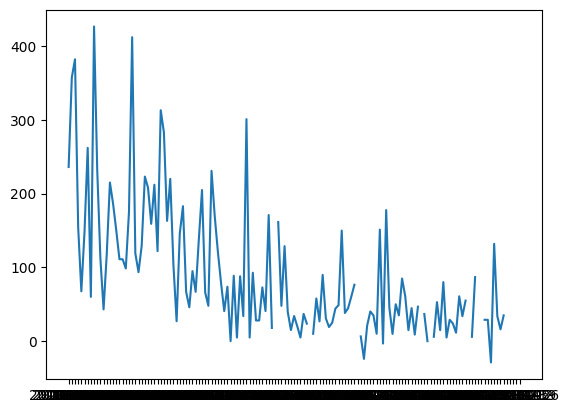

In [21]:
plt.plot(df_store19.loc[df_store19.Dept==54,"Date"], df_store19.loc[df_store19.Dept==54,"Weekly_Sales"])

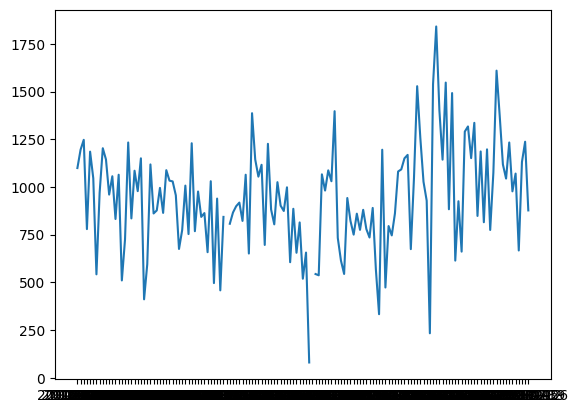

In [22]:
plt.plot(df_store19.loc[df_store19.Dept==50,"Date"], df_store19.loc[df_store19.Dept==50,"Weekly_Sales"])

## fill missing value with median

In [23]:
df_median = df_join.groupby(["Store","Dept"])["Weekly_Sales"].median().reset_index()
df_median.columns = ["Store","Dept","Weekly_Sales_to_fill"]

In [24]:
df_join = df_join.merge(df_median, on = ["Store","Dept"])
df_join.shape

(476333, 15)

In [25]:
df_join.loc[df_join["Weekly_Sales"].isnull(),"Weekly_Sales"] = df_join.loc[df_join["Weekly_Sales"].isnull(),"Weekly_Sales_to_fill"]

In [26]:
np.sum(df_join.isnull())

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Store                        0
Dept                         0
Date                         0
Temperature                  0
Fuel_Price                   0
MarkDown1               307390
MarkDown2               352902
MarkDown3               323633
MarkDown4               327185
MarkDown5               306452
CPI                          0
Unemployment                 0
IsHoliday                    0
Weekly_Sales                 0
Weekly_Sales_to_fill         0
dtype: int64

## Detect outliers

In [27]:
df_iqr = df_join.groupby(["Store","Dept"]).agg(percentile_25 = ('Weekly_Sales',lambda x: x.quantile(0.25)), percentile_75 = ('Weekly_Sales',lambda x: x.quantile(0.75))).reset_index()
df_iqr['upper_bound'] = df_iqr['percentile_75'] + 1.5*(df_iqr['percentile_75'] - df_iqr['percentile_25'])
df_iqr['lower_bound'] = df_iqr['percentile_25'] - 1.5*(df_iqr['percentile_75'] - df_iqr['percentile_25'])
df_iqr

,Store,Dept,percentile_25,percentile_75,upper_bound,lower_bound
0,1,1,16494.630,23214.215,33293.5925,6415.2525
1,1,2,44170.460,47612.245,52774.9225,39007.7825
2,1,3,8693.040,12655.610,18599.4650,2749.1850
3,1,4,34887.740,38268.405,43339.4025,29816.7425
4,1,5,17972.590,25653.795,37175.6025,6450.7825
...,...,...,...,...,...,...
3326,45,94,3246.770,4759.250,7027.9700,978.0500
3327,45,95,49467.360,55822.955,65356.3475,39933.9675
3328,45,96,2.970,2.970,2.9700,2.9700
3329,45,97,6048.125,6865.630,8091.8875,4821.8675


In [28]:
df_join = df_join.merge(df_iqr.drop(columns=["percentile_75","percentile_25"]), on = ["Store","Dept"])
print(df_join.shape)
df_join.head(2)

(476333, 17)


,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Weekly_Sales_to_fill,upper_bound,lower_bound
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50,18535.48,33293.5925,6415.2525
1,1,2,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,50605.27,45561.85,52774.9225,39007.7825


In [29]:
df_join['outlier'] = (df_join['Weekly_Sales'] < df_join['lower_bound']) | (df_join['Weekly_Sales'] > df_join['upper_bound'])
df_join.head(2)

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Weekly_Sales_to_fill,upper_bound,lower_bound,outlier
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50,18535.48,33293.5925,6415.2525,False
1,1,2,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,50605.27,45561.85,52774.9225,39007.7825,False


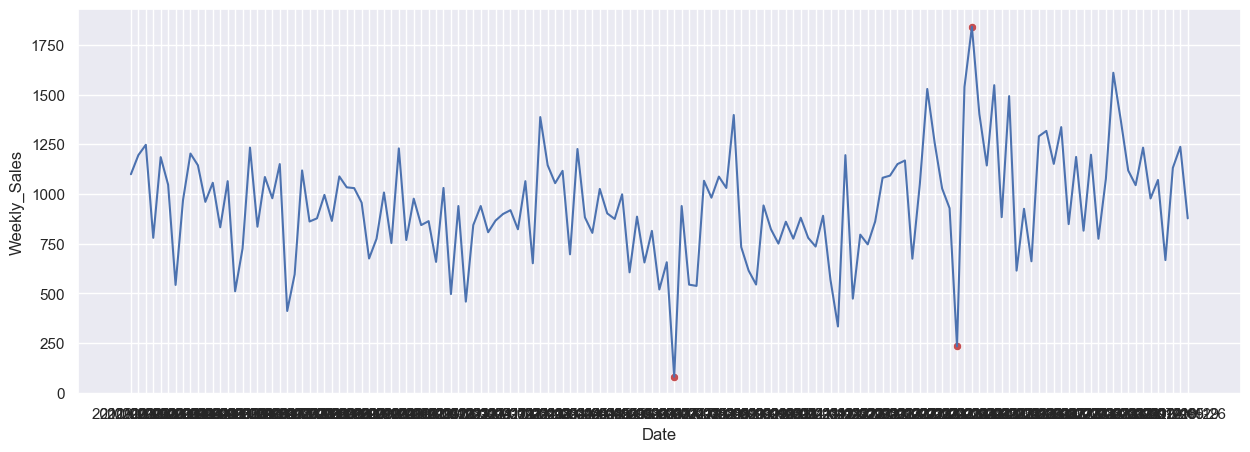

In [48]:
sns.set_theme(rc={'figure.figsize':(15,5)})
df_store19_dept50 = df_join[(df_join['Store']==19)&(df_join['Dept']==50)][["Weekly_Sales","Date"]]
df_store19_dept50_outliers = df_join[(df_join['Store']==19)&(df_join['Dept']==50)&(df_join['outlier'])][["Weekly_Sales","Date"]]
# plot all the values as a lineplot
sns.lineplot(x="Date", y="Weekly_Sales", data=df_store19_dept50)

# select the data when outlier is True and plot it
sns.scatterplot(x="Date", y="Weekly_Sales", data=df_store19_dept50_outliers, c=['r'])

plt.show()

In [49]:
np.sum(df_join.outlier)

27165

## Imput outliers

In [115]:
df_join.loc[df_join["outlier"],"Weekly_Sales"] = None

In [116]:
np.sum(df_join.isnull())

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Store                        0
Dept                         0
Date                         0
Temperature                  0
Fuel_Price                   0
MarkDown1               307390
MarkDown2               352902
MarkDown3               323633
MarkDown4               327185
MarkDown5               306452
CPI                          0
Unemployment                 0
IsHoliday                    0
Weekly_Sales             27165
Weekly_Sales_to_fill         0
upper_bound                  0
lower_bound                  0
outlier                      0
dtype: int64

In [122]:
df_join

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Weekly_Sales_to_fill,upper_bound,lower_bound,outlier
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50,18535.480,33293.5925,6415.2525,False
1,1,2,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,50605.27,45561.850,52774.9225,39007.7825,False
2,1,3,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,13740.12,10366.850,18599.4650,2749.1850,False
3,1,4,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,39954.04,36579.960,43339.4025,29816.7425,False
4,1,5,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,32229.38,21183.420,37175.6025,6450.7825,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476328,45,94,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,5203.31,4120.155,7027.9700,978.0500,False
476329,45,95,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,56017.47,52417.470,65356.3475,39933.9675,False
476330,45,96,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,2.97,2.970,2.9700,2.9700,False
476331,45,97,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,6817.48,6470.520,8091.8875,4821.8675,False


In [54]:
temp  = df_join.groupby(["Store","Dept"])['Weekly_Sales'].apply(lambda x:x.rolling(window=3, min_periods=1).mean()).reset_index()
temp = temp.drop(columns = ["Store","Dept","level_2"])
temp.columns = ["Weekly_Sales_to_fill_outlier"]
temp 

,Weekly_Sales_to_fill_outlier
0,24924.500000
1,35481.995000
2,37519.846667
3,35679.526667
4,27608.996667
...,...
476328,527.210000
476329,534.590000
476330,732.496667
476331,816.376667


In [55]:
df_join=df_join.join(temp)
df_join

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Weekly_Sales_to_fill,upper_bound,lower_bound,outlier,Weekly_Sales_to_fill_outlier
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50,18535.480,33293.5925,6415.2525,False,24924.500000
1,1,2,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,50605.27,45561.850,52774.9225,39007.7825,False,35481.995000
2,1,3,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,13740.12,10366.850,18599.4650,2749.1850,False,37519.846667
3,1,4,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,39954.04,36579.960,43339.4025,29816.7425,False,35679.526667
4,1,5,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,32229.38,21183.420,37175.6025,6450.7825,False,27608.996667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476328,45,94,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,5203.31,4120.155,7027.9700,978.0500,False,527.210000
476329,45,95,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,56017.47,52417.470,65356.3475,39933.9675,False,534.590000
476330,45,96,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,2.97,2.970,2.9700,2.9700,False,732.496667
476331,45,97,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,6817.48,6470.520,8091.8875,4821.8675,False,816.376667


In [56]:
df_join.loc[df_join["Weekly_Sales"].isnull(),"Weekly_Sales"] = df_join.loc[df_join["Weekly_Sales"].isnull(),"Weekly_Sales_to_fill_outlier"]

In [57]:
np.sum(df_join.isnull())

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Store                                0
Dept                                 0
Date                                 0
Temperature                          0
Fuel_Price                           0
MarkDown1                       307390
MarkDown2                       352902
MarkDown3                       323633
MarkDown4                       327185
MarkDown5                       306452
CPI                                  0
Unemployment                         0
IsHoliday                            0
Weekly_Sales                         0
Weekly_Sales_to_fill                 0
upper_bound                          0
lower_bound                          0
outlier                              0
Weekly_Sales_to_fill_outlier         0
dtype: int64